In [15]:
import pandas as pd
import numpy as np

In [16]:
stock_prices = pd.read_csv("sample_prices.csv")

In [17]:
stock_prices.head()

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070


In [18]:
returns = stock_prices.pct_change()

In [19]:
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [20]:
# drop first row
returns = returns.dropna()
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [21]:
# standard deviation
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [28]:
# How to calculate STD
deviations = returns - returns.mean()
sqr_deviations = deviations**2
variance = sqr_deviations.mean()
volatility = np.sqrt(variance)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [29]:
number_of_obs = returns.shape[0]
variance = sqr_deviations.sum()/(number_of_obs - 1)
volatility = variance**0.5

In [30]:
# this will give you the std
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [31]:
# the return Annualized option 1
returns.std()*np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [32]:
#option 2
returns.std()*(12**0.5)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [36]:
returns_portfolio = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv", header=0, index_col=0,
                               parse_dates=True, na_values=-99.99)

In [37]:
returns_portfolio.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [38]:
columns = ['Lo 10', 'Hi 10']
returns_portfolio_one = returns_portfolio[columns]
returns_portfolio_one.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [39]:
# to work with the raw data
returns_portfolio_one = returns_portfolio_one/100
returns_portfolio_one.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [41]:
#Change columns names 
returns_portfolio_one.columns = ['SmallCap', 'LargeCap']
returns_portfolio_one.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


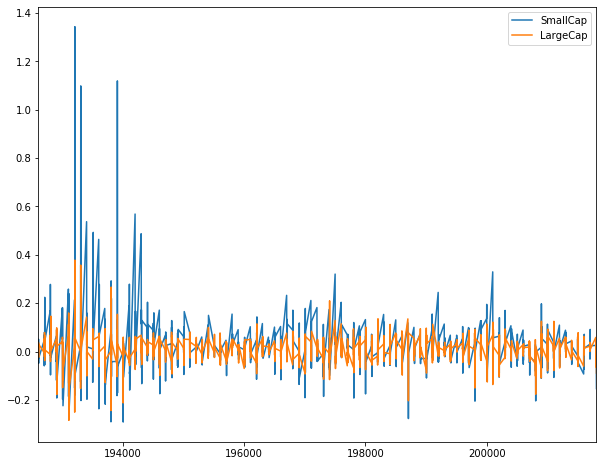

In [44]:
returns_portfolio_one.plot.line(figsize=(10,8))

In [45]:
returns_portfolio_one.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [46]:
annualized_vol = returns_portfolio_one.std()*np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [47]:
# Calculate monthly returns 

# Find how many months in the data set
n_months = returns_portfolio_one.shape[0]

#Calculate the return per month
return_per_month = (returns_portfolio_one + 1).prod()**(1/n_months) - 1
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [48]:
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [49]:
annualized_return = (return_per_month + 1)**12-1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [50]:
# Another way to calculate annualized returns
annualized_return_simple_format = (returns_portfolio_one + 1).prod()**(12/n_months) - 1
annualized_return_simple_format

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [51]:
annualized_return / annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [52]:
risk_free_rate = 0.025
excess_return = annualized_return - risk_free_rate
sharpe_ratio = excess_return / annualized_vol
sharpe_ratio

SmallCap    0.386926
LargeCap    0.363170
dtype: float64